In [5]:
# %config Completer.use_jedi = False

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.1 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Use what you have learned so far. Be creative. List all your findings.

In [4]:
# Read CSV
house_csv = "C:/Users/Lala/Google Drive/Institute_of_Data/DATA/Sacramento_transactions.csv"
house = pd.read_csv(house_csv)


In [4]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [6]:
house.price.describe()

count       985.000000
mean     234144.263959
std      138365.839085
min        1551.000000
25%      145000.000000
50%      213750.000000
75%      300000.000000
max      884790.000000
Name: price, dtype: float64

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [7]:
# ANSWER
# The target variable is Price, we are trying to determine a price based on one of the other variables available

#### 2.2 List all possible variables which might be Predictor variable.

In [8]:
# I think sq__mt is the strongest variable to predict the price

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

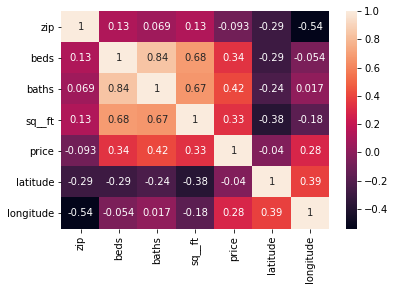

In [9]:
# ANSWER
sns.heatmap(house.corr(),annot=True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


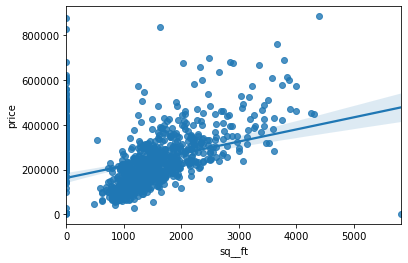

In [10]:
sns.regplot(house['sq__ft'],house['price'],data=house)
plt.show()

In [11]:
house['sq__ft'].describe()

count     985.000000
mean     1314.916751
std       853.048243
min         0.000000
25%       952.000000
50%      1304.000000
75%      1718.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [12]:
house_copy = house.copy()
house_copy = house_copy.drop(house[house['sq__ft']==0].index,axis=0)

In [13]:
house_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     814 non-null    object 
 1   city       814 non-null    object 
 2   zip        814 non-null    int64  
 3   state      814 non-null    object 
 4   beds       814 non-null    int64  
 5   baths      814 non-null    int64  
 6   sq__ft     814 non-null    int64  
 7   type       814 non-null    object 
 8   sale_date  814 non-null    object 
 9   price      814 non-null    int64  
 10  latitude   814 non-null    float64
 11  longitude  814 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


In [14]:
house_copy['sq__ft'].describe()

count     814.000000
mean     1591.146192
std       663.841930
min       484.000000
25%      1144.000000
50%      1418.500000
75%      1851.000000
max      5822.000000
Name: sq__ft, dtype: float64

In [15]:
house_copy = house_copy.drop(house_copy[house_copy['sq__ft']>5000].index,axis=0)

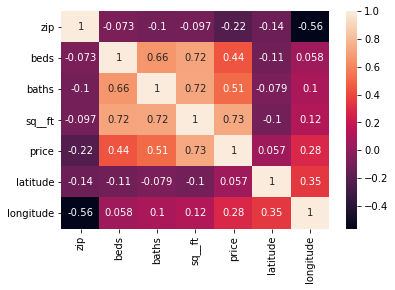

In [16]:
sns.heatmap(house_copy.corr(),annot=True)
plt.show()
# After removin zero sq__ft values the correlation with price is stronger this means we will select this variable as the predictor

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


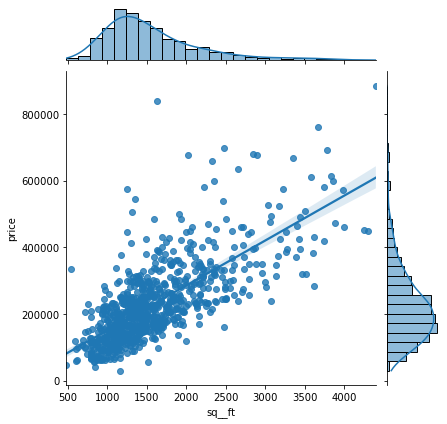

In [17]:
sns.jointplot(house_copy['sq__ft'],house_copy['price'], kind="reg")
plt.show()

In [18]:
house = house_copy

#### 2.4 What is the simplest way to predict price

So we have information for 985 houses. What is the easiest way to predict price of a house?

In [19]:
# ANSWER
# using a linear regretion model based on the sq__ft trend to predict price

#### 2.5 Find Resudals

Find difference between actual value and predicted value. Use absolute value.

In [20]:
# ANSWER

#### 2.6  Predict Using Linear Regression

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line)

### $$\hat{y} = \beta_0 + \beta_1 x$$

> ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

and

> ### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

Given variables:
- $\bar{y}$ : the sample mean of observed values $Y$
- $\bar{x}$ : the sample mean of observed values $X$

##### 2.7 Define X, Y

- X = Predictor Variable 
- Y = Target Variable

In [21]:
# ANSWER
X = house['sq__ft']
Y = house['price']

##### 2.7.A Calculate beta_1

 ### $$ \beta_1 = \frac{\sum_{i=1}^n (y_i - \bar{y} ) (x_i - \bar{x} )}{\sum_{i=1}^n (x_i - \bar{x})^2} $$

In [22]:
# ANSWER
num = sum((Y-Y.mean())*(X-X.mean()))
num

45825772516.30129

In [23]:
den = sum(np.square((X-X.mean())))
den

340355664.28290313

In [24]:
beta_1 = num/den
beta_1

134.64083993681086

##### 2.7.B Calculate beta_0

### $$ \beta_0 = \bar{y} - \beta_1\bar{x} $$

In [25]:
# ANSWER
beta_0 = Y.mean()-(beta_1*X.mean())
beta_0


16195.54559635208

In [26]:
Y.mean()

229728.13407134073

In [27]:
beta_1*X.mean()

213532.58847498865

##### 2.7.C Find Yhat (Predicted Value Using Beta 0 and Beta 1)

### $$\hat{y} = \beta_0 + \beta_1 x$$

In [28]:
# ANSWER
y_hat = beta_0 + (beta_1*X)
y_hat

0      128755.287784
1      173321.405803
2      123369.654186
3      130909.541223
4      123504.295026
           ...      
980    323176.660652
981    215060.066183
982    179918.806960
983    243065.360890
984    199576.369590
Name: sq__ft, Length: 813, dtype: float64

##### 2.7.D Find Residuals

### $$ \text{residual}_i = y_i - \hat{y}_i$$

In [29]:
# ANSWER
residual = (Y - y_hat)
residual.describe().apply(lambda x: format(x, 'f'))

count        813.000000
mean           0.000000
std        81936.042582
min      -220118.259448
25%       -53414.416643
50%       -12256.192174
75%        36035.349459
max       604147.730346
dtype: object

##### 2.7.E Find R-Square

The coefficient $R^2$ is defined as $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$, where $$ SS_{res} $$ is the residual sum of squares $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$ and $$ SS_{res} $$ is the total sum of squares $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

**Write a function to calculate R- Square value.**

The total sum of squares:

### $$ SS_{tot} = \sum_{i=1}^n \left(y_i - \bar{y}\right)^2 $$

The residual sum of squares:

### $$ SS_{res} = \sum_{i=1}^n \left(y_i - \hat{y}_i\right)^2 $$

$R^2$:

### $$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$

In [30]:
# ANSWER
SStot = (Y-Y.mean()).sum()
SStot = SStot * SStot
SStot

8.335346302068558e-16

In [31]:
y_hat.sum()

186768973.0

In [32]:
SSres = (Y-y_hat).sum()
SSres = SSres * SSres
SSres

2.168404344971009e-19

In [33]:
r_pow = 1 - (SSres/SStot)
r_pow

0.9997398543184183

##### 2.7.F [BONUS] Draw Plot of Predicted Line

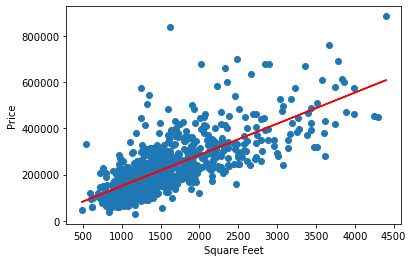

In [34]:
# ANSWER
plt.plot(house['sq__ft'],y_hat, color = 'red')
plt.scatter(house['sq__ft'],house['price'])
plt.xlabel(xlabel='Square Feet')
plt.ylabel('Price')
plt.show()

##### 2.7.G [BONUS] Draw Plot of Predicted Line With Resudals

In [35]:
# ANSWER

### 3. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house.**

In [36]:
# ANSWER
Prediction = beta_0 + (beta_1*1204)
print('This house will be around $' + str(int(Prediction)))

This house will be around $178303




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



